# Deep Learning 

## with Keras by Aurelien Geron

Header Files

In [36]:
import numpy as np 
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import os

#### To Implement a single TLU Network

Training the Iris DataSet

In [17]:
iris = load_iris() 
X = iris.data[:, (2, 3)] # Getting petal length and petal width 
y = (iris.target == 0).astype(np.uint) # Getting if it is an Iris Setosa or not
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

Prediction 

In [18]:
y_prediction = per_clf.predict([[2, 0.5]])
print(y_prediction) 

[0]


Tensorflow Keras 

Using MNIST Fashion

In [21]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print("The shape of the Fashion DataSet is : ", X_train_full.shape)
print("The type of the Fashion DataSet is : ", X_train_full.dtype)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
The shape of the Fashion DataSet is :  (60000, 28, 28)
The type of the Fashion DataSet is :  uint8


Creating a Validiation Set

In [22]:
X_valid, X_train = X_train_full[:5000]/255.00, X_train_full[5000:]/255.00
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
#Class Names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

For Example, the First image in the training set represents a coat:

In [23]:
class_names[y_train[0]]

'Coat'

Creating a model using API

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

The  first  line  creates  a  Sequential  model.  
•Next, we build the first layer and add it to the model. It is a Flatten layer whoserole is simply to convert each input image into a 1D array Since it is the first layer in the model,you should specify the input_shape: this does not include the batch size,

•Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activa‐tion function. Each Dense layer manages its own weight matrix, containing all theconnection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computesEquation 10-2

Next we add a second Dense hidden layer with 100 neurons, also using the ReLUactivation function

Finally,  we  add  a  Dense  output  layer  with  10  neurons  (one  per  class),  using  thesoftmax activation function (because the classes are exclusive

Printing the Layers

In [33]:
model.summary()
model.layers


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

Compiling the Model

In [38]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7000 - loss: 0.9757 - val_accuracy: 0.8332 - val_loss: 0.4971
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8296 - loss: 0.4956 - val_accuracy: 0.8462 - val_loss: 0.4508
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8446 - loss: 0.4472 - val_accuracy: 0.8604 - val_loss: 0.4114
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8525 - loss: 0.4189 - val_accuracy: 0.8556 - val_loss: 0.4087
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8577 - loss: 0.3978 - val_accuracy: 0.8692 - val_loss: 0.3911
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8680 - loss: 0.3721 - val_accuracy: 0.8702 - val_loss: 0.3727
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8734 - loss: 0.3607 - val_accuracy: 0.8690 - val_loss: 0.3673
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8751 - loss: 0.3530 - 

printing the Plots

(0.0, 1.0)

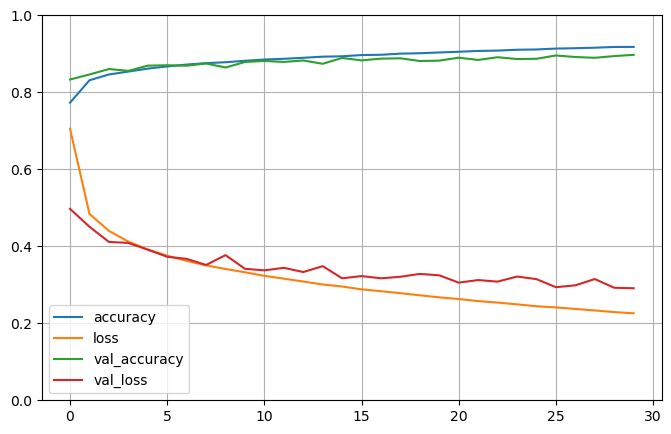

In [41]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]plt.show()

Now testing the model

In [42]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8557 - loss: 58.4941


[59.93318176269531, 0.8536999821662903]

Using the Model to Make Predictions

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Building a Regression MLP Using the Sequential API

Header Files

In [47]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [49]:
model = keras.models.Sequential([    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),    keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20


c:\Users\bsdha\anaconda3\envs\envDeepLearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - val_loss: nan
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 13/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

### Building Complex Models Using the Functional API

In [50]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [51]:
model.compile(loss="mse", optimizer="sgd")
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - val_loss: nan
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 13/20
363/363 ━━━━━━━━━━━━━━━━━

In [55]:
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],outputs=[output, aux_output])
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(    [X_train_A, X_train_B], [y_train, y_train], epochs=20,validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_19_loss: nan - dense_20_loss: 0.4318 - loss: nan - val_dense_19_loss: nan - val_dense_20_loss: 0.2406 - val_loss: nan
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_19_loss: nan - dense_20_loss: 0.1976 - loss: nan - val_dense_19_loss: nan - val_dense_20_loss: 0.1620 - val_loss: nan
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_19_loss: nan - dense_20_loss: 0.1457 - loss: nan - val_dense_19_loss: nan - val_dense_20_loss: 0.1433 - val_loss: nan
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_19_loss: nan - dense_20_loss: 0.1353 - loss: nan - val_dense_19_loss: nan - val_dense_20_loss: 0.1386 - val_loss: nan
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_19_loss: nan - dense_20_loss: 0.1285 - loss: nan - val_dense_19_loss: nan - val_dense_20_loss: 0.1374 - val_loss: nan
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_19_loss: nan - dense_20_loss: 0.1299 - loss: nan -

In [58]:
total_loss, main_loss, aux_loss = model.evaluate(    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main, y_pred_aux)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_19_loss: nan - dense_20_loss: 0.1403 - loss: nan  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[nan]
 [nan]
 [nan]] [[2.0551841]
 [2.0551841]
 [2.0551841]]


Saving and Restoring a Model

In [61]:
model.save("my_keras_model.h5")


## Training Deep Neural Networks